<a href="https://colab.research.google.com/github/Alexandre77777/computer_math/blob/main/6.%20%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%D1%81%20%D1%8D%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8%20%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%D0%BC%D0%B8.%20%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE%D0%BF%D0%BE%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F%20%D0%B8%20%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%20%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80%D1%8B/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%966_%D0%A4%D0%BE%D1%80%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%8D%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №6. Формирование электронных таблиц. Многопоточная и многопроцессорная оптимизация. Работа с генераторами

# Теоретическая часть

## 1. Генераторы в Python

**Генератор данных** - это специальный вид функции в Python, который позволяет создавать последовательность значений по мере необходимости. Вместо того чтобы сразу генерировать и хранить все значения, генератор создает их по одному по требованию.


1. **Создание генератора:**
    - Генератор создается с использованием ключевого слова `yield` внутри функции.
    - Вместо `return`, генератор использует `yield` для возврата значения и приостановки выполнения функции.
    - Пример:
        ```python
        def my_generator():
            yield 1
            yield 2
            yield 3

        gen = my_generator()
        ```

2. **Ленивая загрузка:**
    - Генераторы работают с ленивой загрузкой (lazy evaluation).
    - Они не создают все значения сразу, а только по мере запроса.
    - Это полезно для обработки больших объемов данных, когда нельзя или не нужно хранить все значения в памяти.

3. **Итерация по генератору:**
    - Генераторы можно использовать в циклах `for`.
    - Каждый вызов `yield` возвращает следующее значение из генератора.
    - Пример:
        ```python
        for value in gen:
            print(value)
        ```

4. **Состояние генератора:**
    - Генераторы сохраняют свое состояние между вызовами.
    - После каждого `yield` выполнение функции приостанавливается, а состояние сохраняется.
    - При следующем вызове генератор продолжает выполнение с того места, где остановился.

5. **Применение генераторов:**
    - Генераторы полезны для обработки больших файлов, потоковых данных, бесконечных последовательностей и других сценариев, где требуется эффективная загрузка данных.

### 1.1. **Функция `next()`**

1. **Функция `next()`**:
    - `next()` - это встроенная функция Python, которая используется для получения следующего значения из итератора (включая генераторы).
    - Когда вызывается `next()`, итератор продвигается к следующему элементу и возвращает его.
    - Если больше элементов нет, вызывается исключение `StopIteration`.

2. **Использование в генераторах**:
    - В примерах, которые я предоставил ранее, мы использовали `next()` для получения следующей порции данных из генератора.
    - В генераторах `next()` используется для получения следующего значения, которое было создано с помощью `yield`.
    - Пример:
        ```python
        def my_generator():
            yield 1
            yield 2
            yield 3

        gen = my_generator()

        print(next(gen))  # Выведет 1
        print(next(gen))  # Выведет 2
        print(next(gen))  # Выведет 3
        ```

3. **Обработка исключения `StopIteration`**:
    - Если больше элементов нет, вызывается исключение `StopIteration`.
    - Поэтому важно использовать `next()` внутри блока `try`/`except` для обработки этого исключения.

В общем, `next()` -  позволяет нам получать значения по мере необходимости, что особенно полезно при обработке больших объемов данных.

### 1.2. Примеры генераторов:



1. **Генератор случайных чисел:**
    - Этот генератор возвращает случайные числа в заданном диапазоне.

In [ ]:
import random

def random_numbers(n, min_val, max_val):
    for _ in range(n):
        yield random.randint(min_val, max_val)

In [ ]:
# Пример использования

gen = random_numbers(5, 1, 10)

for num in gen:
    print(num)

6
8
4
4
3


In [ ]:
gen = random_numbers(5, 1, 10)

In [ ]:
next(gen)

9

2. **Генератор бесконечной последовательности чисел:**
    - Этот формирует создает бесконечную последовательность чисел, начиная с заданного значения.


In [ ]:
def infinite_sequence(start=0):
    while True:
        yield start
        start += 1

In [ ]:
# Пример использования
numbers = infinite_sequence(10)
for _ in range(5):
    print(next(numbers))

10
11
12
13
14


In [ ]:
next(numbers)

18


3. **Генератор факториалов:**
    - Этот генератор создает последовательность факториалов чисел.


In [ ]:
def factorial():
    result = 1
    n = 1
    while True:
        yield result
        n += 1
        result *= n

In [ ]:
# Пример использования
fact_gen = factorial()
for _ in range(6):
    print(next(fact_gen))

1
2
6
24
120
720


4. **Генератор строк из файла:**
    - Этот генератор читает строки из текстового файла по одной.


In [ ]:
def generate_text_file(file_path="my_text_file.txt", num_lines=15):
    with open(file_path, 'w') as file:
        for i in range(1, num_lines + 1):
            file.write(f"This is line {i}\n")
generate_text_file()

def read_lines(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            yield line.strip()

In [ ]:
# Пример использования
file_path = "my_text_file.txt"

gen = read_lines(file_path)

for line in gen:
    print(line)

This is line 1
This is line 2
This is line 3
This is line 4
This is line 5
This is line 6
This is line 7
This is line 8
This is line 9
This is line 10
This is line 11
This is line 12
This is line 13
This is line 14
This is line 15


In [ ]:
gen = read_lines(file_path)

In [ ]:
next(gen)

'This is line 1'

## 2. Оптимизация вычислений

Оптимизация программного обеспечения является важной частью разработки программного обеспечения. Она включает в себя ряд техник и подходов, направленных на улучшение производительности и эффективности программы. Одним из способов достижения этого является использование параллелизма, который может быть реализован с помощью процессов или потоков.


- **Процесс** - это программа, которая выполняется на вашем компьютере. Каждый процесс имеет свое собственное виртуальное пространство памяти и работает независимо от других процессов. Процессы могут взаимодействовать друг с другом через системные вызовы.

- **Поток**, с другой стороны, является частью процесса. Потоки в одном процессе могут делиться некоторыми ресурсами, такими как память, что делает их более легкими и быстрее в создании и переключении, чем процессы. Потоки в одном процессе могут работать параллельно, что позволяет более эффективно использовать многоядерные процессоры.



Можно сказать, что процесс - это как программа, выполняющаяся на вашем компьютере, а поток - это задача, которую выполняет этот процесс. Если у вас есть несколько потоков в одном процессе, они могут выполнять задачи параллельно.

В зависимости от конкретных требований и ограничений вашего приложения, вы можете выбрать использовать либо процессы, либо потоки для оптимизации вашей программы. Оба подхода имеют свои преимущества и недостатки, и выбор между ними будет зависеть от специфики вашей задачи.

### 2.1. Модули для управления процессами и потоками в Python

- **Multiprocessing** в Python - это модуль, который позволяет создавать процессы, используя API. Он обеспечивает как локальную, так и удаленную параллельность, эффективно обходя глобальную блокировку интерпретатора за счет использования подпроцессов вместо потоков. Это позволяет полностью использовать несколько ядер (процессоров) на данной машине. Он работает как на POSIX, так и на Windows.

- **ThreadPoolExecutor** в Python - это класс, который предоставляет возможность создания и использования пула потоков для эффективного выполнения задач параллельно. Этот класс является частью стандартной библиотеки Python и предлагает легко используемые пулы рабочих потоков посредством современного шаблона исполнителя. Он идеален для выполнения циклов задач ввода-вывода параллельно и для выдачи задач асинхронно.

> В обоих случаях, `multiprocessing` и `ThreadPoolExecutor` предоставляют удобные и эффективные способы для параллельного выполнения задач в Python. Они оба являются мощными инструментами, которые могут значительно улучшить производительность и эффективность ваших программ на Python. Однако выбор между ними зависит от конкретных требований и ограничений вашего приложения. В некоторых случаях может быть предпочтительнее использовать `multiprocessing`, в то время как в других случаях лучше использовать `ThreadPoolExecutor`.

#### *Таблица №1. Сравнительная таблица Multiprocessing и ThreadPoolExecutor*

| Критерий | Multiprocessing | ThreadPoolExecutor |
|---|---|---|
| **Тип** | **Процессы** | **Потоки** |
| **Совместное использование данных** | **Сериализация** | **Объекты Python** |
| **Скорость** | **Высокая** | **Средняя** |
| **Сложность** | **Высокая** | **Низкая** |
| **Ошибки** | **Ошибки сериализации** | **Ограничения потоков** |
| **Подходит для** | **Задачи, требующие много ресурсов** | **Задачи, не требующие много ресурсов** |


**Рекомендации:**

* **Используйте** Multiprocessing для задач, которые **можно** разделить на **независимые** части и **требуют** много ресурсов.
* **Используйте** ThreadPoolExecutor для задач, которые **не** требуют большого количества ресурсов и **не могут** быть разделены на независимые части.


### 2.2. Сериализация

**Сериализация** - это процесс преобразования объекта Python в байтовый поток, который можно сохранить или передать по сети. Это может быть полезно для сохранения данных, обмена данными между программами или для удаленного выполнения кода.

**Пример:**

```python
import pickle

a = [1, 2, 3]

with open("data.pkl", "wb") as f:
    pickle.dump(a, f)

with open("data.pkl", "rb") as f:
    b = pickle.load(f)

print(a == b)  # True
```

В этом примере мы сериализовали список `a` в файл `data.pkl`. Затем мы десериализовали файл обратно в переменную `b`.

#### Объекты Python

**Объекты Python** - это сущности, которые имеют состояние и поведение. Они могут быть созданы из классов или с помощью встроенных функций Python.

**Пример:**

```python
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

p = Person("John Doe", 30)

print(p.name)  # John Doe
print(p.age)  # 30
```

В этом примере мы создали класс `Person` и затем создали объект `p` этого класса.

#### Сериализация и объекты Python

* **Сериализация** может быть использована для совместного использования данных между процессами или машинами.
* **Объекты Python** могут быть сериализованы для сохранения их состояния или для передачи их по сети.



### 2.3. **Простыми словами:**

##### **2.3.1. Процессы и потоки:**



- **Процесс:**
  - Представьте себе **пекарню**. Пекарня – это **процесс**, в котором происходит выпечка хлеба. В пекарне есть разные **инструменты** (миксеры, печи) и **ингредиенты** (мука, вода), которые используются для создания **продукта** (хлеба).

- **Поток:**
  - Теперь представьте, что **пекари** – это **потоки** в пекарне. Каждый пекарь выполняет **часть** работы (замешивает тесто, ставит хлеб в печь), но все они **вместе**

**В чем разница?**
* **Процесс** – это **самостоятельная** программа, которая работает в **своей** памяти.
* **Поток** – это **часть** процесса, которая выполняется **одновременно** с другими потоками.




##### **2.3.2. Многопроцессорность и пул потоков:**

1. **Multiprocessing (Многопроцессорность)**:
    - Представьте, что у вас есть несколько "рабочих", каждый из которых выполняет свою задачу.
    - В многопроцессорном подходе каждый рабочий (процесс) работает в отдельном ядре (процессоре).
    - Это позволяет выполнять несколько задач одновременно, так как каждый процесс имеет свои собственные ресурсы (память, вычислительную мощность).
    - Пример: Если у вас есть 4 ядра на компьютере, вы можете запустить 4 процесса параллельно для ускорения вычислений.

2. **ThreadPoolExecutor (Пул потоков)**:
    - Представьте, что у вас есть команда рабочих, работающих в одной комнате.
    - В пуле потоков все рабочие (потоки) используют общие ресурсы (память, вычислительную мощность).
    - Они могут выполнять разные задачи, но в одном и том же ядре (процессоре).
    - Это позволяет эффективно использовать доступные ресурсы, но потоки работают последовательно (не одновременно).
    - Пример: Если у вас есть 4 ядра, но много задач, пул потоков поможет распределить работу между потоками.



>**Вывод**: Многопроцессорность позволяет выполнять задачи одновременно, но требует больше ресурсов. Пул потоков более эффективен в использовании ресурсов, но работает последовательно. Выбор зависит от конкретной задачи и доступных ресурсов.

### 2.4. Примеры

### 2.4.1. Пример №1

Ниже приведен пример кода на Python, который демонстрирует использование модулей `multiprocessing` и `ThreadPoolExecutor` для параллельного выполнения задачи. Задача, которую выполняет этот код, - это возведение в квадрат каждого числа в диапазоне от 0 до 100000:

1. В начале кода определяется функция `task`, которая принимает число и возвращает его квадрат. Затем определяется функция `measure_time`, которая измеряет время выполнения функции.

2. В основной части кода сначала выполняется последовательное выполнение задачи с использованием функции `map`. Затем та же задача выполняется параллельно с использованием модуля `multiprocessing`. Наконец, задача выполняется с использованием `ThreadPoolExecutor`.

3. Время выполнения каждого из этих подходов замеряется и выводится на экран. Это позволяет сравнить производительность каждого подхода.

In [14]:
import multiprocessing
import time
import math
from concurrent.futures.thread import ThreadPoolExecutor


# def task(x):
#     return x ** 2

# def task(x):
#     with open("data.txt", "w+") as f:
#         data = f.read()
#     result = x ** 2 + len(data)
#     return result

def task(x):
    if x % 11 == 0:
        time.sleep(0.0001)  # Имитация более длительной задачи
    return x ** 2


def measure_time(func, args):
    start = time.time()
    result = func(*args)
    end = time.time()
    return end - start

num_processes = multiprocessing.cpu_count()

if __name__ == '__main__':
    # Sequential execution (no multiprocessing or ThreadPoolExecutor)
    sequential_time = measure_time(list, [map(task, range(100000))])
    print(f"Sequential execution time: {sequential_time:.4f} seconds")

    # multiprocessing
    with multiprocessing.Pool(processes=num_processes) as pool:
        multiprocessing_time = measure_time(pool.map, [task, range(100000)])
    print(f"Multiprocessing time: {multiprocessing_time:.4f} seconds")

    # ThreadPoolExecutor
    with ThreadPoolExecutor() as executor:
        threadpoolexecutor_time = measure_time(executor.map, [task, range(100000)])
    print(f"ThreadPoolExecutor time: {threadpoolexecutor_time:.4f} seconds")

Sequential execution time: 1.4807 seconds
Multiprocessing time: 0.8013 seconds
ThreadPoolExecutor time: 3.3575 seconds


### 2.4.2. Пример №2

Следующий пример кода на Python демонстрирует использование модулей `multiprocessing` и `ThreadPoolExecutor` для параллельного вычисления геодезического расстояния между парами точек, представленных в DataFrame.

1. В начале кода определяется функция `generate_random_dataframe`, которая генерирует DataFrame с указанным количеством случайных значений для широты и долготы. Затем создается DataFrame с 100 случайными точками.
2. Функция `calculate_distance` вычисляет геодезическое расстояние между двумя точками, используя библиотеку `geopy`.
3. Затем определены три функции для вычисления расстояний между всеми парами точек: `parallel_distance_calculation`, `parallel_distance_calculation_multiprocessing` и `parallel_distance_calculation_threadpool`. Первая функция вычисляет расстояния последовательно, вторая использует `multiprocessing` для параллельного вычисления, а третья использует `ThreadPoolExecutor`.
4. В конце кода измеряется время выполнения каждого из этих подходов и выводится на экран. Это позволяет сравнить производительность каждого подхода.

In [16]:
import pandas as pd
from geopy.distance import geodesic
import multiprocessing as mp
from concurrent.futures import ThreadPoolExecutor
import numpy as np
import time


# Предположим, у нас есть DataFrame с GPS-координатами
def generate_random_dataframe(num_values, lat_range=(30, 60), lon_range=(-130, 130)):
    """
    Генерирует датафрейм с указанным количеством случайных значений для широты и долготы.

    :param num_values: Количество значений
    :param lat_range: Диапазон для широты (по умолчанию от 30 до 60)
    :param lon_range: Диапазон для долготы (по умолчанию от -130 до 130)
    :return: Датафрейм с случайными значениями
    """
    latitudes = np.random.uniform(low=lat_range[0], high=lat_range[1], size=num_values)
    longitudes = np.random.uniform(low=lon_range[0], high=lon_range[1], size=num_values)

    df = pd.DataFrame({
        'id': range(1, num_values + 1),
        'lat': latitudes,
        'lon': longitudes
    })

    return df

# Формируем DataFrame
df = generate_random_dataframe(100)


# Функция для вычисления расстояния между двумя точками
def calculate_distance(pair):
    idx1, idx2 = pair
    coord1 = (df.at[idx1, 'lat'], df.at[idx1, 'lon'])
    coord2 = (df.at[idx2, 'lat'], df.at[idx2, 'lon'])
    return geodesic(coord1, coord2).kilometers


# Вычисление без оптимизации
def parallel_distance_calculation(df):
    pairs = [(i, j) for i in df.index for j in df.index if i < j]
    distances = []
    for pair in pairs:
        distances.append(calculate_distance(pair))
    return distances, pairs


# Функция для параллельного вычисления, используя multiprocessing
def parallel_distance_calculation_multiprocessing(df):
    pairs = [(i, j) for i in df.index for j in df.index if i < j]
    pool = mp.Pool(processes=mp.cpu_count())
    distances = pool.map(calculate_distance, pairs)
    pool.close()
    pool.join()
    return distances, pairs


# Функция для параллельного вычисления, используя ThreadPoolExecutor
def parallel_distance_calculation_threadpool(df):
    pairs = [(i, j) for i in df.index for j in df.index if i < j]
    with ThreadPoolExecutor() as executor:
        distances = list(executor.map(calculate_distance, pairs))
    return distances, pairs

In [17]:
if __name__ == "__main__":

    # Измеряем время без оптимизации
    start_time = time.time()
    distances_multiprocessing, _ = parallel_distance_calculation(df)
    end_time = time.time()
    print(f"Время выполнения без оптимизации: {end_time - start_time:.4f} секунд")

    # Измеряем время c multiprocessing
    start_time = time.time()
    distances_multiprocessing, _ = parallel_distance_calculation_multiprocessing(df)
    end_time = time.time()
    print(f"Время выполнения c multiprocessing: {end_time - start_time:.4f} секунд")

    # Измеряем время выполнения с ThreadPoolExecutor
    start_time = time.time()
    distances_threadpool, _ = parallel_distance_calculation_threadpool(df)
    end_time = time.time()
    print(f"Время выполнения с ThreadPoolExecutor: {end_time - start_time:.4f} секунд")

    # # Вызов функции и получение `pairs`
    # distances, pairs = parallel_distance_calculation(df)

    # # Вывод результатов
    # for pair, distance in zip(pairs, distances):
    #     print(f"Расстояние между точками {pair[0]} и {pair[1]}: {distance:.2f} км")

Время выполнения без оптимизации: 2.6121 секунд
Время выполнения c multiprocessing: 1.2052 секунд
Время выполнения с ThreadPoolExecutor: 1.6670 секунд


**Время выполнения вычислений для 1000 точек на процессоре Intel Xeon e5 2678v3 (12 ядер/24 потока):**

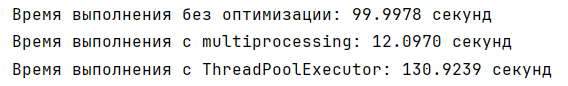

### 2.4.1. Пример №3 (Дополнительный)

Вспомним оптимизацию вычислений используя cupu:

In [18]:
import time
import numpy as np

# Попытка импортировать cupy
try:
    import cupy as cp
    use_cuda = cp.is_available()
except ImportError:
    use_cuda = False

# use_cuda = False

def process_on_cpu(data):
    # Умножение матриц на CPU с использованием numpy
    return np.dot(data, data)

def process_on_gpu(data):
    # Умножение матриц на GPU с использованием cupy
    data_gpu = cp.asarray(data)
    result_gpu = cp.dot(data_gpu, data_gpu)
    return cp.asnumpy(result_gpu)

# Функция для замера времени выполнения
def measure_time(func, data):
    start_time = time.time()
    result = func(data)
    end_time = time.time()
    print(f"Время выполнения {func.__name__}: {end_time - start_time} секунд")
    # return result

# Данные для обработки
data = np.random.rand(1000, 1000)

# Выбор функции обработки в зависимости от доступности CUDA
if use_cuda:
    print("CUDA доступна. Используем GPU для обработки.")
    process_data = process_on_gpu
else:
    print("CUDA не доступна. Используем CPU для обработки.")
    process_data = process_on_cpu

# Замер скорости выполнения
measure_time(process_data, data)

CUDA доступна. Используем GPU для обработки.
Время выполнения process_on_gpu: 0.40411829948425293 секунд


# Практическая часть

Реализуем эффективное программное решение прямой геодезической задачи

- Входные данные:
  - csv-файл с параметрами (Xa, Ya, d, alpha)

- Выходные данные (опционально):
  - csv-файл с вычесленными параметрами (dX, dY, Xb, Yb)
  - xlsx-файл с вычесленными параметрами (dX, dY, Xb, Yb)
  - DataFrame с вычесленными параметрами (dX, dY, Xb, Yb)


## 1. Генератор синтетического набора входных данных

In [19]:
import random
import csv
import numpy as np
from openpyxl import Workbook

def generate_data(filename, num_files=1, num_records_range=(100, 200),
                  Xa_range=(1100, 10000), Ya_range=(1100, 10000),
                  d_range=(1, 1500), alpha_range=(1, 360), save_xlsx=False):

    for i in range(num_files):
        num_records = random.randint(*num_records_range)

        # Создание массивов NumPy
        Xa = np.random.uniform(*Xa_range, size=num_records)
        Ya = np.random.uniform(*Ya_range, size=num_records)
        d = np.random.uniform(*d_range, size=num_records)
        alpha = np.random.uniform(*alpha_range, size=num_records)

        data = np.column_stack((Xa, Ya, d, alpha))

        file_extension = ".csv" # По умолчанию сохраняем в формате CSV
        if save_xlsx:
            file_extension = ".xlsx" # Если указано сохранение в XLSX

        if i > 0:
            full_filename = f"{filename}_{i}{file_extension}" # Добавляем индекс к имени файла
        else:
            full_filename = f"{filename}{file_extension}"

        if save_xlsx:
            wb = Workbook()
            ws = wb.active
            ws.append(["Xa", "Ya", "d", "alpha"])
            ws.append(data)
            wb.save(full_filename)
        else:
            with open(full_filename, 'w', newline='') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerow(["Xa", "Ya", "d", "alpha"])
                writer.writerows(data)

        print(f"Данные сгенерированы и сохранены в {full_filename}")

In [84]:
generate_data("big_data", num_files=1, num_records_range=(10000000, 15000000))
generate_data("my_data", num_files=5, num_records_range=(10000, 15000))

Данные сгенерированы и сохранены в big_data.csv
Данные сгенерированы и сохранены в my_data.csv
Данные сгенерированы и сохранены в my_data_1.csv
Данные сгенерированы и сохранены в my_data_2.csv
Данные сгенерированы и сохранены в my_data_3.csv
Данные сгенерированы и сохранены в my_data_4.csv


## 2. Функция-генератор для последовательного считывания входных данных

In [39]:
import os
import pandas as pd

def process_csv(path, chunk_size=1000):
    """
    Обрабатывает все CSV файлы в папке или один CSV файл и возвращает ограниченный набор данных.

    Args:
        path (str): Путь к папке с CSV файлами или к одному CSV файлу.
        chunk_size (int, optional): Количество возвращаемых строк. По умолчанию 1000.

    Yields:
        pd.DataFrame: Часть данных из каждого CSV файла.
    """
    if os.path.isdir(path):
        # Обрабатываем все CSV файлы в папке
        for filename in os.listdir(path):
            if filename.lower().endswith(".csv"):
                file_path = os.path.join(path, filename)
                first_row = pd.read_csv(file_path, nrows=1, header=None)
                if first_row.applymap(lambda x: isinstance(x, (int, float))).all().all():
                    header_value = None
                else:
                    header_value = 0
                for chunk in pd.read_csv(file_path, chunksize=chunk_size, header=header_value):
                    yield chunk.reset_index(drop=True)
    elif os.path.isfile(path) and path.lower().endswith(".csv"):
        # Обрабатываем один CSV файл
        first_row = pd.read_csv(path, nrows=1, header=None)
        if first_row.applymap(lambda x: isinstance(x, (int, float))).all().all():
            header_value = None
        else:
            header_value = 0
        for chunk in pd.read_csv(path, chunksize=chunk_size, header=header_value):
            yield chunk.reset_index(drop=True)
    else:
        raise ValueError("Недопустимый путь к файлу или папке.")

In [38]:
# Пример использования
path = "/content/my_data_1.csv"
csv_gen = process_csv(path, 100)
# for data_chunk in csv_gen:
#     print(data_chunk.head())
next(csv_gen)

,Xa,Ya,d,alpha
0,7331.485458,2138.116904,1121.231564,44.766220
1,7560.096759,5896.040922,633.662187,230.907365
2,5194.482169,6364.271765,219.634537,309.528495
3,1158.446721,5004.358367,1032.525954,279.733258
4,8880.181430,3383.471842,38.667579,56.064904
...,...,...,...,...
95,3942.436541,7842.371446,735.633291,142.559257
96,2451.996830,3091.639663,482.009532,39.373410
97,2951.562269,3092.207362,1171.415132,240.886495
98,1695.025816,6842.994748,1129.192610,147.258938


## 3. Реализация функции для решения прямой геодезической задачи

### 2.1. Базовая реализация

In [43]:
import math
import pandas as pd

def direct_task(df):
    # Инициализируем списки для хранения результатов
    dX = []
    dY = []
    Xb = []
    Yb = []

    # Итерируем по каждой строке в датафрейме
    for index, row in df.iterrows():
        # Извлекаем значения из строки
        Xa = float(row['Xa'])
        Ya = float(row['Ya'])
        d = float(row['d'])
        alpha = float(row['alpha'])

        # Вычисляем dX и dY с помощью math
        dX.append(d * math.cos(math.radians(alpha)))
        dY.append(d * math.sin(math.radians(alpha)))

        # Вычисляем Xb и Yb
        Xb.append(Xa + dX[-1])
        Yb.append(Ya + dY[-1])

    # Создаем новый датафрейм с результатами
    result_df = pd.DataFrame({
        'dX': dX,
        'dY': dY,
        'Xb': Xb,
        'Yb': Yb
    })

    return result_df

In [24]:
sample_df = pd.DataFrame({
    'Xa': [25.0, 2.0, 3.0],
    'Ya': [140.0, 5.0, 6.0],
    'd': [124.0, 8.0, 9.0],
    'alpha': [46.97, 60.0, 30.0]
})

result = direct_task(sample_df)
print(result)

          dX         dY          Xb          Yb
0  84.615269  90.643567  109.615269  230.643567
1   4.000000   6.928203    6.000000   11.928203
2   7.794229   4.500000   10.794229   10.500000


### 2.2. Оптимальная реализация с векторизацией вычислений

In [74]:
import numpy as np
import pandas as pd

def direct_task(df):
    try:
        # Извлекаем значения из колонок датафрейма
        Xa = df['Xa'].astype(float)
        Ya = df['Ya'].astype(float)
        d = df['d'].astype(float)
        alpha = df['alpha'].astype(float)

        # Вычисляем dX и dY с помощью NumPy
        dX = d * np.cos(np.radians(alpha))
        dY = d * np.sin(np.radians(alpha))

        # Вычисляем Xb и Yb
        Xb = Xa + dX
        Yb = Ya + dY

        # Создаем новый датафрейм с результатами
        result_df = pd.DataFrame({
            'dX': dX,
            'dY': dY,
            'Xb': Xb,
            'Yb': Yb
        })

        return result_df

    except:
        return None


In [75]:
sample_df = pd.DataFrame({
    'Xa': [25.0, 2.0, 3.0],
    'Ya': [140.0, 5.0, 6.0],
    'd': [124.0, 8.0, 9.0],
    'alpha': [46.97, 60.0, 30.0]
})

result = direct_task(sample_df)
print(result)

          dX         dY          Xb          Yb
0  84.615269  90.643567  109.615269  230.643567
1   4.000000   6.928203    6.000000   11.928203
2   7.794229   4.500000   10.794229   10.500000


### 2.3. Оптимальная реализация с векторизацией вычислений и их выполнением на GPU

In [71]:
import pandas as pd
import cupy as cp

def direct_task(df):
    try:
        # Извлекаем значения из колонок датафрейма
        Xa = cp.asarray(df['Xa'].astype(float))
        Ya = cp.asarray(df['Ya'].astype(float))
        d = cp.asarray(df['d'].astype(float))
        alpha = cp.asarray(df['alpha'].astype(float))

        # Вычисляем dX и dY с помощью CuPy
        dX = d * cp.cos(cp.radians(alpha))
        dY = d * cp.sin(cp.radians(alpha))

        # Вычисляем Xb и Yb
        Xb = Xa + dX
        Yb = Ya + dY

        # Создаем новый датафрейм с результатами
        result_df = pd.DataFrame({
            'dX': cp.asnumpy(dX),
            'dY': cp.asnumpy(dY),
            'Xb': cp.asnumpy(Xb),
            'Yb': cp.asnumpy(Yb)
        })

        return result_df

    except:
        return None

In [72]:
sample_df = pd.DataFrame({
    'Xa': [25.0, 2.0, 3.0],
    'Ya': [140.0, 5.0, 6.0],
    'd': [124.0, 8.0, 9.0],
    'alpha': [46.97, 60.0, 30.0]
})

result = direct_task(sample_df)
print(result)

          dX         dY          Xb          Yb
0  84.615269  90.643567  109.615269  230.643567
1   4.000000   6.928203    6.000000   11.928203
2   7.794229   4.500000   10.794229   10.500000


## 4. Многопоточная и многопроцессорная оптимизация. Сравнение и выбор оптимального варианта

In [95]:
import multiprocessing
from concurrent.futures import ThreadPoolExecutor
import pandas as pd
import numpy as np
import time

def parallel_processing(df, num_processes=multiprocessing.cpu_count(), use_multiprocessing=False, proc_fun = direct_task):
    """
    Разделяет датафрейм на фрагменты и обрабатывает их параллельно с помощью ThreadPoolExecutor или multiprocessing.

    Args:
        df (pandas.DataFrame): Исходный датафрейм.
        num_processes (int, optional): Количество процессов/потоков для использования. По умолчанию используется количество ядер CPU.
        use_multiprocessing (bool, optional): True - использовать multiprocessing, False - ThreadPoolExecutor.

    Returns:
        pandas.DataFrame: Объединенный результат обработки фрагментов.
    """

    # Разделяем датафрейм на фрагменты
    df_split = np.array_split(df, num_processes)

    if use_multiprocessing:
        # Multiprocessing
        with multiprocessing.Pool(processes=num_processes) as pool:
            result_list = pool.map(proc_fun, df_split)
    else:
        # ThreadPoolExecutor
        with ThreadPoolExecutor(max_workers=num_processes) as pool:
            result_list = pool.map(proc_fun, df_split)

    # Объединяем результаты
    final_df = pd.concat([result for result in result_list if result is not None])

    return final_df


# Пример использования
if __name__ == "__main__":
    # Ваш датафрейм (замените на свой)
    df = pd.read_csv("/content/big_data.csv")

    # Выполнение без multiprocessing
    start_time = time.time()
    result_df_direct = direct_task(df)
    end_time = time.time()
    direct_time = end_time - start_time
    print(f"Время выполнения без multiprocessing: {direct_time:.4f} секунд")

    # Выполнение с multiprocessing
    start_time = time.time()
    result_df_multiprocessing = parallel_processing(df.copy(), use_multiprocessing=True)
    end_time = time.time()
    parallel_time = end_time - start_time
    print(f"Время выполнения с multiprocessing: {parallel_time:.4f} секунд")

    # Выполнение с ThreadPoolExecutor
    start_time = time.time()
    result_df_threadpoolexecutor = parallel_processing(df.copy(), use_multiprocessing=False)
    end_time = time.time()
    threadpoolexecutor_time = end_time - start_time
    print(f"Время выполнения с ThreadPoolExecutor: {threadpoolexecutor_time:.4f} секунд")

Время выполнения без multiprocessing: 1.4373 секунд
Время выполнения с multiprocessing: 5.3835 секунд
Время выполнения с ThreadPoolExecutor: 1.4291 секунд


## 5. Функция для последовательного экспорта выходных данных

In [88]:
import pandas as pd

def process_and_save_with_function(generator, processing_function=None, output_file='output.csv', save_xlsx=False):
    """
    Обрабатывает данные из генератора с помощью указанной функции и сохраняет результаты в CSV или XLSX файл.

    Args:
        generator: Генератор, возвращающий pd.DataFrame.
        output_file (str): Имя файла для сохранения результатов.
        save_xlsx (bool, optional): Сохранять в формате XLSX (True) или CSV (False). По умолчанию False.
        processing_function (function, optional): Функция для обработки данных из генератора. Должна принимать pd.DataFrame и возвращать pd.DataFrame.
    """
    header_value = None
    first_chunk = next(generator, None)
    if first_chunk is not None:
        if processing_function:
            first_chunk = processing_function(first_chunk)
        if save_xlsx:
            header_value = 0
            wb = pd.ExcelWriter(output_file, engine='openpyxl')
            first_chunk.to_excel(wb, sheet_name='Sheet1', index=False, header=header_value)
        else:
            # Если нет заголовков, заполняем первую строку цифрами
            if first_chunk.columns.empty:
                first_chunk.columns = range(1, len(first_chunk.columns) + 1)
            first_chunk.to_csv(output_file, index=False, header=True)
        for chunk in generator:
            if processing_function:
                chunk = processing_function(chunk)
            if save_xlsx:
                chunk.to_excel(wb, sheet_name='Sheet1', index=False, header=header_value)
            else:
                chunk.to_csv(output_file, mode='a', index=False, header=False)  # Добавляем данные без заголовков
        if save_xlsx:
            wb.save()
        # print(f"Результаты сохранены в файл {output_file}")
    else:
        print("Нет данных для обработки.")

In [91]:
def measure_time(func, args):
    start = time.time()
    func(*args)
    end = time.time()
    return end - start

# Запуск функции с разными методами и измерение времени

path = "/content/big_data.csv"

generator = process_csv(path, 1000000)
processing_function = direct_task
sequential_time = measure_time(process_and_save_with_function, args=(generator, processing_function))

print(f"Время  выполнения: {sequential_time:.10f} секунд")

Время  выполнения: 93.1332972050 секунд


## Выполним те же действия без использования генераторов:

In [92]:
start_time = time.time()
sample_df = pd.read_csv("/content/big_data.csv")

result = direct_task(sample_df)
result.to_csv("output_file.csv", index=False, header=True)
end_time = time.time()
print(f"Время выполнения: {end_time - start_time} секунд")

# result.head(15)

Время выполнения: 96.58828115463257 секунд


In [ ]:
del sample_df
del result

# Комплексное задание №1.

### Ссылка на алгоритм вычисления и пример : https://clck.ru/39aKXC

## **Ход выполнения работы:**

### 1. Напишите функцию для формирования синтетического набора входных данных

Требования к входным данным:

- excel-таблицы или csv-файлы (опционально)
- первая строка содержит заголовки столбцов
- данные в столбцах - значения B (широты) и L (долготы)

Пример:

| B | L |
|---|---|
| 56.4532 | 37.5432 |
| 45.6789 | 12.3456 |
| -34.5678 | 98.7654 |
| 78.9012 | -56.7890 |
| 23.4567 | 89.0123 |
| -12.3456 | 45.6789 |
| 67.8901 | -23.4567 |
| 34.5678 | 78.9012 |
| -98.7654 | 34.5678 |
| 12.3456 | -98.7654 |

**Примечание:**

* Эта таблица содержит 10 случайных значений широты и долготы
* Широта может быть от -90° до 90°
* Долгота может быть от -180° до 180°

In [ ]:
# Ваш код

### 2. Напишите функцию-генератор для последовательного считывания данных из входного файла (csv-файл, excel-таблица)

- Функция принимает на вход путь к файлу и количество строк, которые необходимо возвращать каждую итерацию. Сама функция последовательно возвращает указанное Вами количество строк, до тех пор, пока они не закончатся в этом файле

- Возвращает DataFrame, с указанным количеством строк

In [ ]:
# Ваш код

### 3. Напишите оптимальную функцию для реализации алгоритма

- Принимает на вход DataFrame с входными данными
- Возвращает DataFrame с выходными данными (вычесленными параметрами)
- Вычисления должны быть реализованы средствами numpy
- Добавить опционально возможность вычисления на CUDA GPU

In [ ]:
# Ваш код

### 4. Оптимизируйте вычисления, используя Multiprocessing, ThreadPoolExecutor и CuPy

- Сравните их по скорости. Выведите время выполнения с их использованием и без их использования
- Выберите оптимальный вариант оптимизации на CPU

In [ ]:
# Ваш код

### 5. Напишите функцию для для последовательного экспорта выходных данных в книгу Excel

- На каждую пару входных данных (строку таблицы входных данных) в книге должен формироваться отдельный лист с расчетами по [образцу](https://clck.ru/39aKXC)

In [ ]:
# Ваш код

### Выполните вычисления, сравните скорости на большом массиве входных данных

In [ ]:
# Ваш код


- Выведите первую строку таблицы **входных** данных


In [ ]:
# Ваш код

- Выведите содержимое первой страницы таблицы **выходных** данных

In [ ]:
# Ваш код